In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import cv2
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [1]:
import os
import matplotlib.pyplot as plt

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


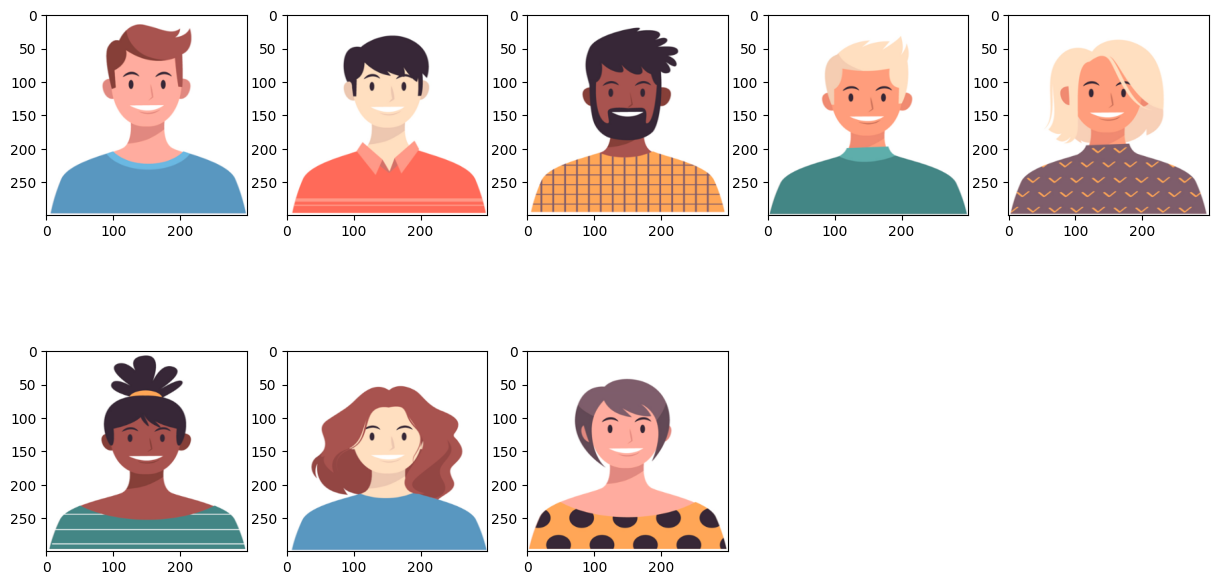

In [3]:
dir = 'Avatar'
i = 0
imgData = []
plt.figure(figsize=(15,8))
for file in os.listdir(dir):
    filePath = os.path.join(dir, file)
    img = cv2.imread(filePath)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, (300,300))
    imgData.append(img)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    i = i+1
    if i%10 == 0:
        break
plt.show()


In [11]:
import numpy as np

In [17]:
imgData = np.array(imgData)
print(imgData.shape)

(10, 300, 300, 3)


In [21]:
for i, img in enumerate(imgData):
    j = 0
    img = img.reshape(1,300,300,3)
    for batch in datagen.flow(
        img, save_to_dir='augmented/',
        save_prefix='aug_'+str(i)+'_', save_format='jpg'
    ):
        j += 1
        if j >= 10:
            break

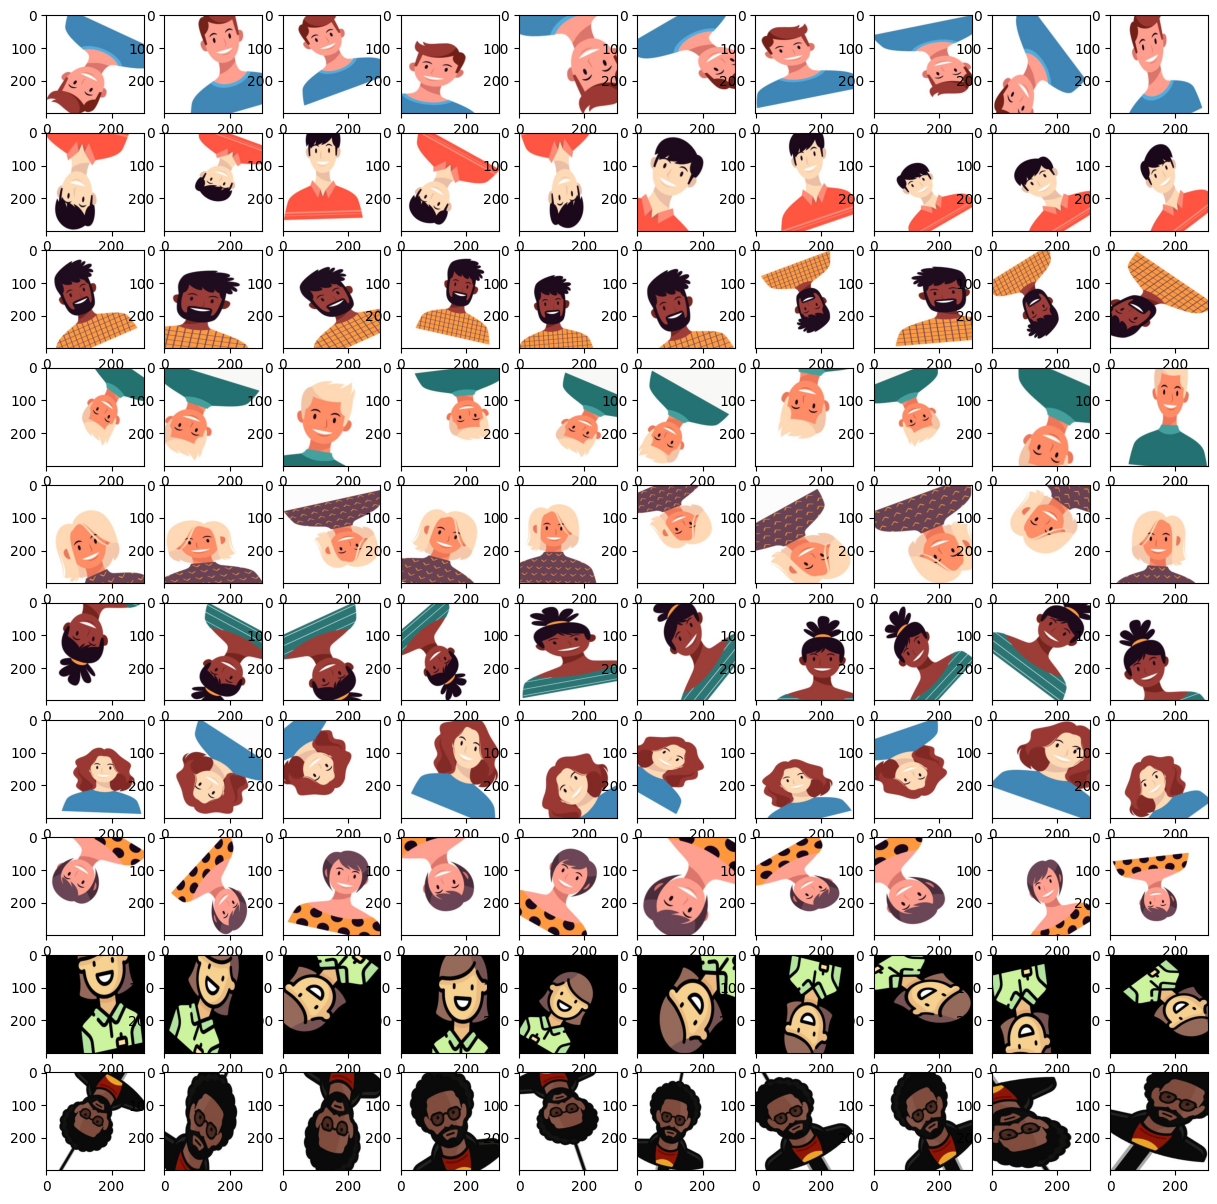

In [25]:
dir = 'augmented/'
i = 0
plt.figure(figsize=(15,15))
for file in os.listdir(dir):
    filePath = os.path.join(dir, file)
    img = cv2.imread(filePath)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    i = i+1
plt.show()